In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
companies=pd.read_csv(r"C:\Users\hp\Desktop\PythonCoding\Excel-Projects\50_Startups.csv")
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [56]:
companies.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [57]:
#Numerical/Statistical analysis of the dataset
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [58]:
#Dimensions of dataset
companies.shape

(50, 5)

In [59]:
#Check for duplicated values
companies.duplicated().sum()

0

In [60]:
#Check for null values
companies.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [61]:
#Schema of dataset
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Data Visualization

<AxesSubplot:>

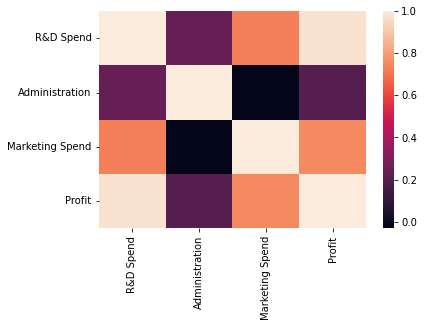

In [62]:
#Building correlation matrix
sns.heatmap(companies.corr())

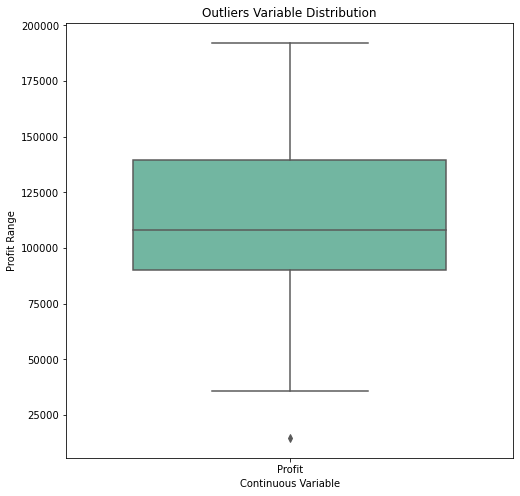

In [63]:
#Outliers detection in the target variable
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=companies[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

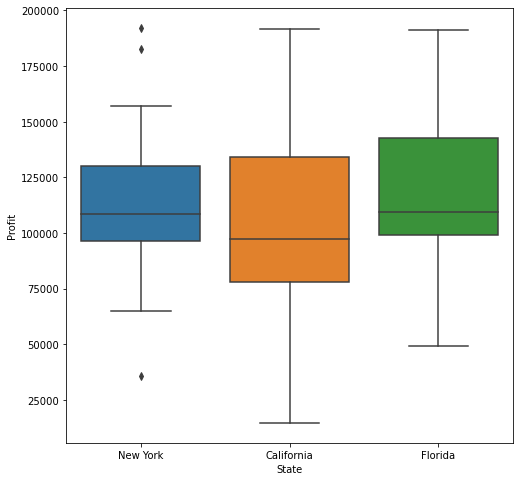

In [64]:
#State-wise outliers detection
sns.boxplot(x = 'State', y = 'Profit', data = companies)
plt.show()

All outliers presented are in New York.

Histogram on Profit



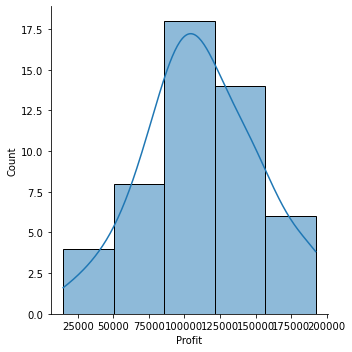

In [65]:
sns.displot(companies['Profit'],bins=5,kde=True)
plt.show()

Inference: The average profit (which is 100k) is the most frequent i.e. this should be in the category of distribution plot.



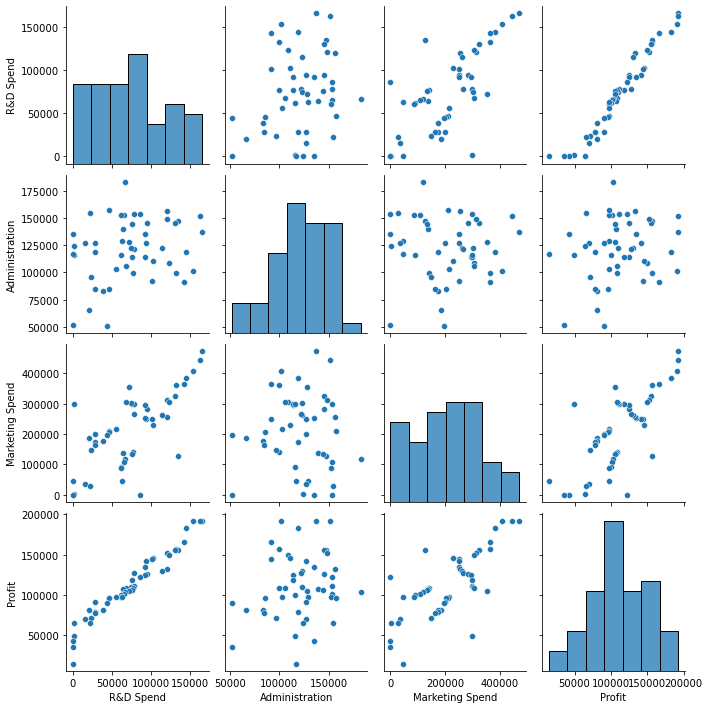

In [66]:
sns.pairplot(companies)
plt.show()

1. As we can see in the pair pot, Research and development are directly proportional to the investment that we can do.

2. The marketing spend seems to be directly proportional (though a little bit outliers are there) with the profit.

3. There is no relationship between the second column and profit i.e. our target column.

Model Development

In [67]:
# spliting Dataset in Dependent & Independent Variables
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

Label Encoder: Encode labels with values between 0 and n_classes-1

In [68]:
#Encoding Categorical Data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])
X1 = pd.DataFrame(X)
X1.head()

#ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
#X = ct.fit_transform(X)

#onehotencoder= OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [69]:
#Avoid Dummy Variable Trap
#X = X[:,1:]

In [70]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([[55493.95, 103057.49, 214634.81, 1],
       [46014.02, 85047.44, 205517.64, 2],
       [75328.87, 144135.98, 134050.07, 1],
       [46426.07, 157693.92, 210797.67, 0],
       [91749.16, 114175.79, 294919.57, 1],
       [130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
    

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [74]:
#Testing the model using the predict function

y_pred = model.predict(X_test)
y_pred

array([103959.40508021, 132398.73236694, 133529.03790148,  72958.28368314,
       179534.78737166, 115533.62584099,  67476.95847883,  98504.36199396,
       114789.16083781, 168972.21909945])

Testing score

In [75]:
testing_data_model_score = model.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9386861070938134
Model Score/Performance on Training data 0.9500009880362247


Comparing the predicted values and actual values

In [76]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,103959.405080,103282.38
1,132398.732367,144259.40
2,133529.037901,146121.95
3,72958.283683,77798.83
4,179534.787372,191050.39
5,115533.625841,105008.31
6,67476.958479,81229.06
7,98504.361994,97483.56
8,114789.160838,110352.25
9,168972.219099,166187.94


In [77]:
#Calculating the Coefficients
regressor.coef_

array([ 1.11938236e+05, -8.46786292e+03, -5.40998321e+04, -1.78330141e+04,
        0.00000000e+00, -2.36536877e+04,  7.66095990e+04,  0.00000000e+00,
       -1.45186256e+04,  3.17149356e+04,  1.07281390e+05,  1.76613067e+05,
        5.80119090e+04, -3.90165037e+04,  3.79821519e+04,  0.00000000e+00,
        4.29065516e+04,  5.73246960e+04,  2.53977174e+04, -5.55095025e+04,
        0.00000000e+00,  2.41703027e+04,  0.00000000e+00,  0.00000000e+00,
       -1.96491586e+04,  5.33611013e+04,  5.53150890e+04,  5.36456121e+04,
       -8.99261550e+04, -1.07011813e+04,  2.45493910e+04,  3.49381170e+04,
        2.48887398e+04, -5.40978575e+04,  0.00000000e+00,  0.00000000e+00,
        1.40354007e+03, -4.58257903e+04, -4.12740867e+04,  9.39225622e+04,
       -1.50785345e+04,  5.27993068e+04,  6.06565941e+04,  0.00000000e+00,
        3.52853485e+04,  0.00000000e+00,  1.67991571e+04, -1.27854301e+04,
       -2.94835351e+04,  5.32519599e+03,  2.41583391e+04,  2.06093042e+00,
        2.24285382e-01])

In [79]:
#Calculating the Intercept
regressor.intercept_

-207062.19514820012

In [80]:
#Evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9386861070938134